# Розно Константин 18-ИВТ-2

# 16 Вариант (Glass) Классификаторы: 1/3

### Цель лабораторной работы – получение навыков работы с методами классификации.
   #### 1. Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных (включить полученные описания в отчёт).
   #### 2. Удалите дубликаты строк в наборе данных; приведите размер набора данных до и после данной операции;
   #### 3. Оцените сбалансированность данных по классам (постройте гистограмму). Используйте полученную информацию при выборе метрики оценки качества классификации (PR или ROC кривая)
   #### 4. Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlot для признаков до и после масштабирования. Выберите способ масштабирования (например, нормализацию или стандартизацию);
   #### 5. Выполните замену категориальных признаков; выберите и обоснуйте способ замены;
  ####  6. Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других (удалять признаки нужно только для линейных методов классификации);
####    7. Заполните пропущенные значения в данных;
  ####  8. Решите поставленную задачу классификации в соответствии с заданием. При подборе параметров классификатора используйте метод GridSearchCV и перекрёстную проверку (изучите возможные для изменения параметры классификации). Определите схему построения многоклассового классификатора, используемую по умолчанию (опишите используемую схему кодирования, обоснуйте свой выбор). Постройте, если это возможно, многоклассовую классификацию на основе схем «один-против-всех» и «все-против-всех». Оцените точность классификации для каждой их схем. Постройте кривые PR и ROC (для каждого из классов должны быть построены отдельные кривые, а также кривые для микро и макроусреднения метрик качества). Для линейного классификатора используйте регуляризацию. 
  ####  9. Сравните кривые для классификаторов, указанных в задании, сделайте выводы.

### 1) 

In [221]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.calibration import CalibratedClassifierCV
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, precision_recall_curve, average_precision_score, roc_curve, auc
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
%matplotlib inline
import warnings

##### 1. Id number: Идентификационный номер (Удален из csv файла)
##### 2. RI - refractive index: Показатель преломления
##### 3. Na - Sodium: Натрий
##### 4. Mg - Magnesium: Магний
##### 5. Al - Aluminum: Алюминий
##### 6. Si - Silicon: Кремний
##### 7. K - Potassium: Калий
##### 8. Ca - Calcium: Кальций
##### 9. Ba - Barium: Барий
##### 10. Fe - Iron: Железо
##### 11. Type of glass: Тип стекла (Всего 7, но 4 тип отсутствует в csv файле)

### 2)

In [222]:
gdf = pd.read_csv("glass.csv")

In [223]:
gdf

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [224]:
gdf.shape

(214, 10)

In [225]:
gdf.drop_duplicates(keep="first", inplace=True)

In [226]:
gdf.shape

(213, 10)

### 3)

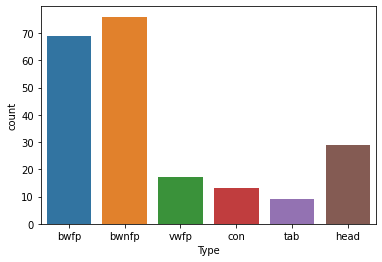

In [227]:
sns.barplot(data=pd.DataFrame({
    'count': [len(gdf.loc[gdf["Type"] == 1]),
              len(gdf.loc[gdf["Type"] == 2]),
              len(gdf.loc[gdf["Type"] == 3]),
              len(gdf.loc[gdf["Type"] == 5]),
              len(gdf.loc[gdf["Type"] == 6]),
              len(gdf.loc[gdf["Type"] == 7]),],
    'Type': ['bwfp',
             'bwnfp',
             'vwfp',
             'con',
             'tab',
             'head'],}),
     y='count', x='Type')

#### По гистограмме наблюдаем преобладание первых двух классов:
building_windows_float_processed | building_windows_non_float_processed

### 4)

In [228]:
gdf.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,1.518348,13.404085,2.679202,1.449484,72.655070,0.498873,8.954085,0.175869,0.057277,2.788732
std,0.003033,0.816662,1.443691,0.495925,0.773998,0.653185,1.425882,0.498245,0.097589,2.105130
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516520,12.900000,2.090000,1.190000,72.280000,0.130000,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.560000,8.600000,0.000000,0.000000,2.000000
75%,1.519150,13.810000,3.600000,1.630000,73.090000,0.610000,9.150000,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [229]:
categorical_columns = [i for i in gdf.columns if gdf[i].dtype.name == 'Type']
numerical_columns = [i for i in gdf.columns if gdf[i].dtype.name != 'Type']
print('Категориальные признаки:')
print(categorical_columns)
print('Количественные признаки:')
print(numerical_columns)

Категориальные признаки:
[]
Количественные признаки:
['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type']


Type не является количественным признаком, поэтому при масштабировании исключим этот признак.

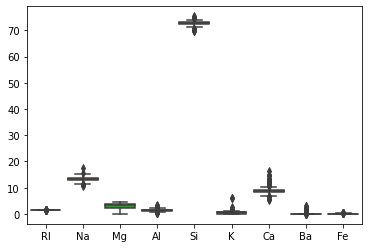

In [230]:
from sklearn import preprocessing
sns.boxplot(data=gdf[['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']])

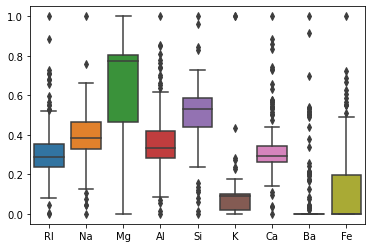

In [231]:
scaler = preprocessing.MinMaxScaler()
gdf[['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']] = scaler.fit_transform(gdf[['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']].values.astype(float))
sns.boxplot(data=gdf[['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']])

### 5)

In [232]:
def replacement_categorical(data, feature):
    for i in data[feature].unique():
        data[feature + '' + str(i)] = (data[feature] == i).astype(float)

replacement_categorical(gdf, 'Type')
gdf

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type,Type1,Type2,Type3,Type5,Type6,Type7
0,0.432836,0.437594,1.000000,0.252336,0.351786,0.009662,0.308550,0.000000,0.0,1,1.0,0.0,0.0,0.0,0.0,0.0
1,0.283582,0.475188,0.801782,0.333333,0.521429,0.077295,0.223048,0.000000,0.0,1,1.0,0.0,0.0,0.0,0.0,0.0
2,0.220808,0.421053,0.790646,0.389408,0.567857,0.062802,0.218401,0.000000,0.0,1,1.0,0.0,0.0,0.0,0.0,0.0
3,0.285777,0.372932,0.821826,0.311526,0.500000,0.091787,0.259294,0.000000,0.0,1,1.0,0.0,0.0,0.0,0.0,0.0
4,0.275241,0.381955,0.806236,0.295950,0.583929,0.088567,0.245353,0.000000,0.0,1,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,0.223003,0.512782,0.000000,0.806854,0.500000,0.012882,0.348513,0.336508,0.0,7,0.0,0.0,0.0,0.0,0.0,1.0
210,0.250219,0.630075,0.000000,0.529595,0.580357,0.000000,0.276022,0.504762,0.0,7,0.0,0.0,0.0,0.0,0.0,1.0
211,0.417032,0.545865,0.000000,0.538941,0.644643,0.000000,0.279740,0.520635,0.0,7,0.0,0.0,0.0,0.0,0.0,1.0
212,0.235294,0.548872,0.000000,0.514019,0.678571,0.000000,0.283457,0.498413,0.0,7,0.0,0.0,0.0,0.0,0.0,1.0


In [233]:
gdf.drop(columns='Type', inplace=True)
gdf.rename(columns={'Type1':'Bwfp'}, inplace=True)
gdf.rename(columns={'Type2':'Bwnfp'}, inplace=True)
gdf.rename(columns={'Type3':'Vwfp'}, inplace=True)
gdf.rename(columns={'Type5':'Con'}, inplace=True)
gdf.rename(columns={'Type6':'Tab'}, inplace=True)
gdf.rename(columns={'Type7':'Head'}, inplace=True)
gdf

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Bwfp,Bwnfp,Vwfp,Con,Tab,Head
0,0.432836,0.437594,1.000000,0.252336,0.351786,0.009662,0.308550,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.283582,0.475188,0.801782,0.333333,0.521429,0.077295,0.223048,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.220808,0.421053,0.790646,0.389408,0.567857,0.062802,0.218401,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.285777,0.372932,0.821826,0.311526,0.500000,0.091787,0.259294,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.275241,0.381955,0.806236,0.295950,0.583929,0.088567,0.245353,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,0.223003,0.512782,0.000000,0.806854,0.500000,0.012882,0.348513,0.336508,0.0,0.0,0.0,0.0,0.0,0.0,1.0
210,0.250219,0.630075,0.000000,0.529595,0.580357,0.000000,0.276022,0.504762,0.0,0.0,0.0,0.0,0.0,0.0,1.0
211,0.417032,0.545865,0.000000,0.538941,0.644643,0.000000,0.279740,0.520635,0.0,0.0,0.0,0.0,0.0,0.0,1.0
212,0.235294,0.548872,0.000000,0.514019,0.678571,0.000000,0.283457,0.498413,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### 6)

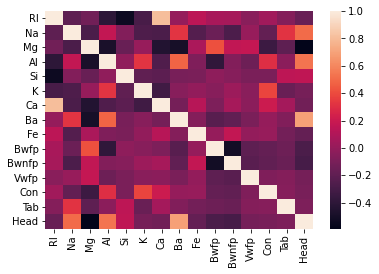

In [234]:
gdfcm = gdf.corr()
sns.heatmap(gdfcm)

### 7)

In [235]:
gdf.count()

RI       213
Na       213
Mg       213
Al       213
Si       213
K        213
Ca       213
Ba       213
Fe       213
Bwfp     213
Bwnfp    213
Vwfp     213
Con      213
Tab      213
Head     213
dtype: int64

#### Пропусков нет

### 8)

In [236]:
X = gdf.drop(('Tab'), axis=1)
y = gdf['Tab']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 11)

##### Классификатор K ближайших соседей (задаётся количество ближайших объектов)

In [237]:
knn = KNeighborsClassifier()

search = GridSearchCV(knn, {'n_neighbors': [x for x in range(1, 100)]})
search.fit(X_train, y_train)

n = search.best_estimator_.n_neighbors
best = search.best_score_
print('best:', best, ', neighbors num:', n, sep=' ')

knn = KNeighborsClassifier(n_neighbors=n)
knn.fit(X_train, y_train)
knn_predict = knn.predict(X_test)
print('Accuracy knn: %.5f' % accuracy_score(y_test, knn_predict))

best: 1.0 , neighbors num: 1
Accuracy knn: 1.00000


##### Линейный классификатор (персептрон)

In [238]:
ppn = Perceptron()

search = GridSearchCV(estimator=ppn, param_grid={
    'alpha': np.linspace(0, 1, 20)[1:],
    'max_iter': [x for x in range(1, 100)],
}, n_jobs=-1)
search.fit(X_train, y_train)
alpha = search.best_estimator_.alpha
max_iter = search.best_estimator_.max_iter
best = search.best_score_
print('best:', best, 'alpha:', alpha, 'max_iter:', max_iter)

ppn = Perceptron(alpha=alpha, max_iter=max_iter)
ppn.fit(X_train, y_train)
ppn_predict = ppn.predict(X_test)
print('Accuracy ppn: %.5f' % accuracy_score(y_test, ppn_predict))

best: 0.9866666666666667 alpha: 0.05263157894736842 max_iter: 2
Accuracy ppn: 0.95312


#### 9) 

In [239]:
inversiontest_y = [1-y for y in y_test]

prob_knn = knn.predict_proba(X_test)

cppn = CalibratedClassifierCV(ppn, cv=2)
cppn.fit(X_train, y_train)
prob_ppn = cppn.predict_proba(X_test)

#### PR Кривые

In [240]:
def addPlotPr(prob, occupancy, label, test):
    precision, recall, _ = precision_recall_curve(test, prob[:, occupancy])
    aps = average_precision_score(test, prob[:, occupancy])
    plt.plot(recall, precision, label='%s PR (area = %f)' % (label, aps))

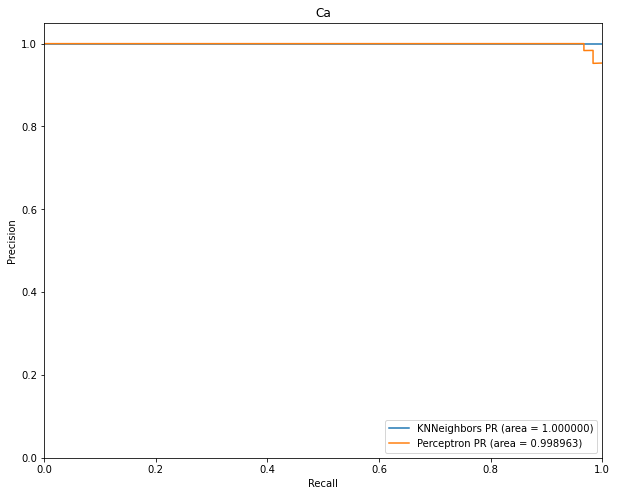

In [241]:
plt.figure(figsize=(10,8))

addPlotPr(prob_knn, 0, 'KNNeighbors', inversiontest_y)
addPlotPr(prob_ppn, 0, 'Perceptron', inversiontest_y)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('Ca')
plt.legend(loc=4, fontsize='medium')
plt.show()

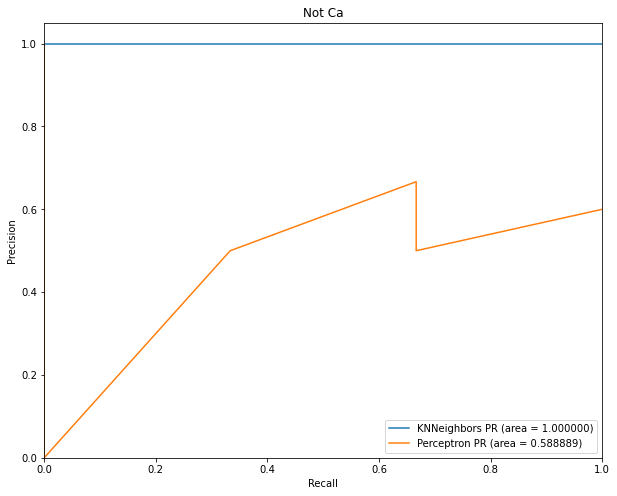

In [242]:
plt.figure(figsize=(10,8))

addPlotPr(prob_knn, 1, 'KNNeighbors', y_test)
addPlotPr(prob_ppn, 1, 'Perceptron', y_test)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('Not Ca')
plt.legend(loc=4, fontsize='medium')
plt.show()

#### ROC графики

In [243]:
def addPlotRoc0(prob, label, test):
    tpr, fpr, _ = roc_curve(test, prob[:, 0])
    roc_auc  = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='%s ROC (area = %f)' % (label, roc_auc)) 

def addPlotRoc1(prob, label, test):
    fpr, tpr, _ = roc_curve(test, prob[:, 1])
    roc_auc  = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='%s ROC (area = %f)' % (label, roc_auc))

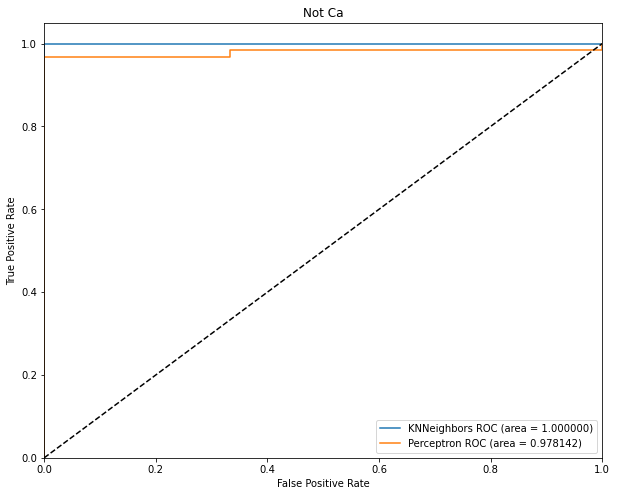

In [244]:
plt.figure(figsize=(10,8))

addPlotRoc0(prob_knn, 'KNNeighbors', y_test)
addPlotRoc0(prob_ppn, 'Perceptron', y_test)

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4, fontsize='medium')
plt.title('Not Ca')
plt.show()

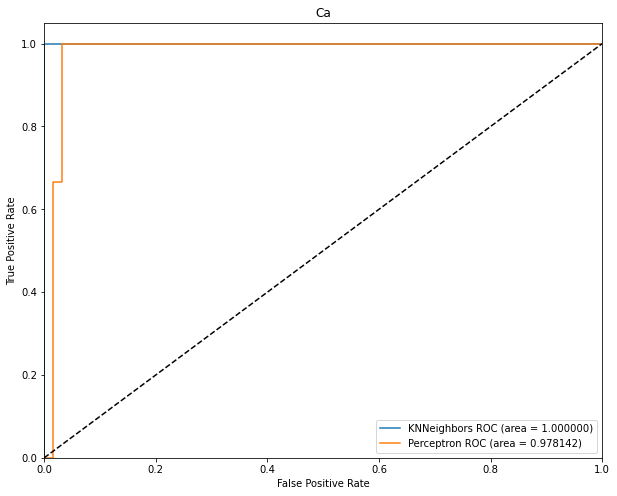

In [245]:
plt.figure(figsize=(10,8))

addPlotRoc1(prob_knn, 'KNNeighbors', y_test)
addPlotRoc1(prob_ppn, 'Perceptron', y_test)

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4, fontsize='medium')
plt.title('Ca')
plt.show()